# Importation des packages

In [1]:
import pandas as pd

In [2]:
from src.preprocessing import (
    load_all_data,
    explorer_colonnes_interactives,
    analyser_donnees_interactive,
    plot_missing_values,
    supprimer_colonnes_trop_vides,
    imputer_valeurs_manquantes,
    supprimer_lignes_trop_vides,
    convertir_binaires_en_object,
    reduire_types,
    nettoyer_colonnes_categorielles_application,
    nettoyer_colonnes_categorielles_bureau,
    verifier_unicite_id,
    afficher_valeurs_uniques_objet,
    nettoyer_colonnes_categorielles_previous
)

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 200)  

# Partie 1 : Exploration des données

## Chargement des datasets

In [4]:
data_path = r"C:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\data\original"
data = load_all_data(data_path)

✅ Fichier application_test.csv chargé avec encodage utf-8
✅ Fichier application_train.csv chargé avec encodage utf-8
✅ Fichier bureau.csv chargé avec encodage utf-8
✅ Fichier bureau_balance.csv chargé avec encodage utf-8
✅ Fichier credit_card_balance.csv chargé avec encodage utf-8
✅ Fichier HomeCredit_columns_description.csv chargé avec encodage iso-8859-1
✅ Fichier installments_payments.csv chargé avec encodage utf-8
✅ Fichier POS_CASH_balance.csv chargé avec encodage utf-8
✅ Fichier previous_application.csv chargé avec encodage utf-8
✅ Fichier sample_submission.csv chargé avec encodage utf-8


In [5]:
print("Fichiers chargés :", list(data.keys()))

Fichiers chargés : ['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'HomeCredit_columns_description', 'installments_payments', 'POS_CASH_balance', 'previous_application', 'sample_submission']


## Description des colonnes

In [6]:
# Accès simple aux DataFrames
col_desc = data['HomeCredit_columns_description']

In [7]:
col_desc.columns

Index(['Unnamed: 0', 'Table', 'Row', 'Description', 'Special'], dtype='object')

In [8]:
col_desc['Table'].unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [9]:
# Accès direct depuis le dictionnaire de données
explorer_colonnes_interactives(col_desc, n=10, table='application_{train|test}.csv')

interactive(children=(IntSlider(value=0, description='Page', max=12), Output()), _dom_classes=('widget-interac…

In [10]:
explorer_colonnes_interactives(col_desc, n=10, table='bureau.csv')

interactive(children=(IntSlider(value=0, description='Page', max=1), Output()), _dom_classes=('widget-interact…

In [11]:
explorer_colonnes_interactives(col_desc, n=10, table='bureau_balance.csv')

interactive(children=(IntSlider(value=0, description='Page', max=0), Output()), _dom_classes=('widget-interact…

In [12]:
explorer_colonnes_interactives(col_desc, n=10, table='POS_CASH_balance.csv')

interactive(children=(IntSlider(value=0, description='Page', max=0), Output()), _dom_classes=('widget-interact…

In [13]:
explorer_colonnes_interactives(col_desc, n=10, table='credit_card_balance.csv')

interactive(children=(IntSlider(value=0, description='Page', max=2), Output()), _dom_classes=('widget-interact…

In [14]:
explorer_colonnes_interactives(col_desc, n=10, table='previous_application.csv')

interactive(children=(IntSlider(value=0, description='Page', max=3), Output()), _dom_classes=('widget-interact…

In [15]:
explorer_colonnes_interactives(col_desc, n=10, table='installments_payments.csv')

interactive(children=(IntSlider(value=0, description='Page', max=0), Output()), _dom_classes=('widget-interact…

## Application train 

In [48]:
app_train = data['application_train']

On regarde le type des données, le % de valeurs manquantes et les valeurs uniques 

In [49]:
analyse_app = analyser_donnees_interactive(app_train)
analyse_app

interactive(children=(IntSlider(value=0, description='Page', max=12), Output()), _dom_classes=('widget-interac…

In [50]:
verifier_unicite_id(app_train, id_col='SK_ID_CURR', nom_df='application_train')

📊 Vérification pour application_train
Nombre de lignes          : 307511
Nombre d'identifiants uniques : 307511
✅ Il y a UNE ligne par client (identifiant unique).


True

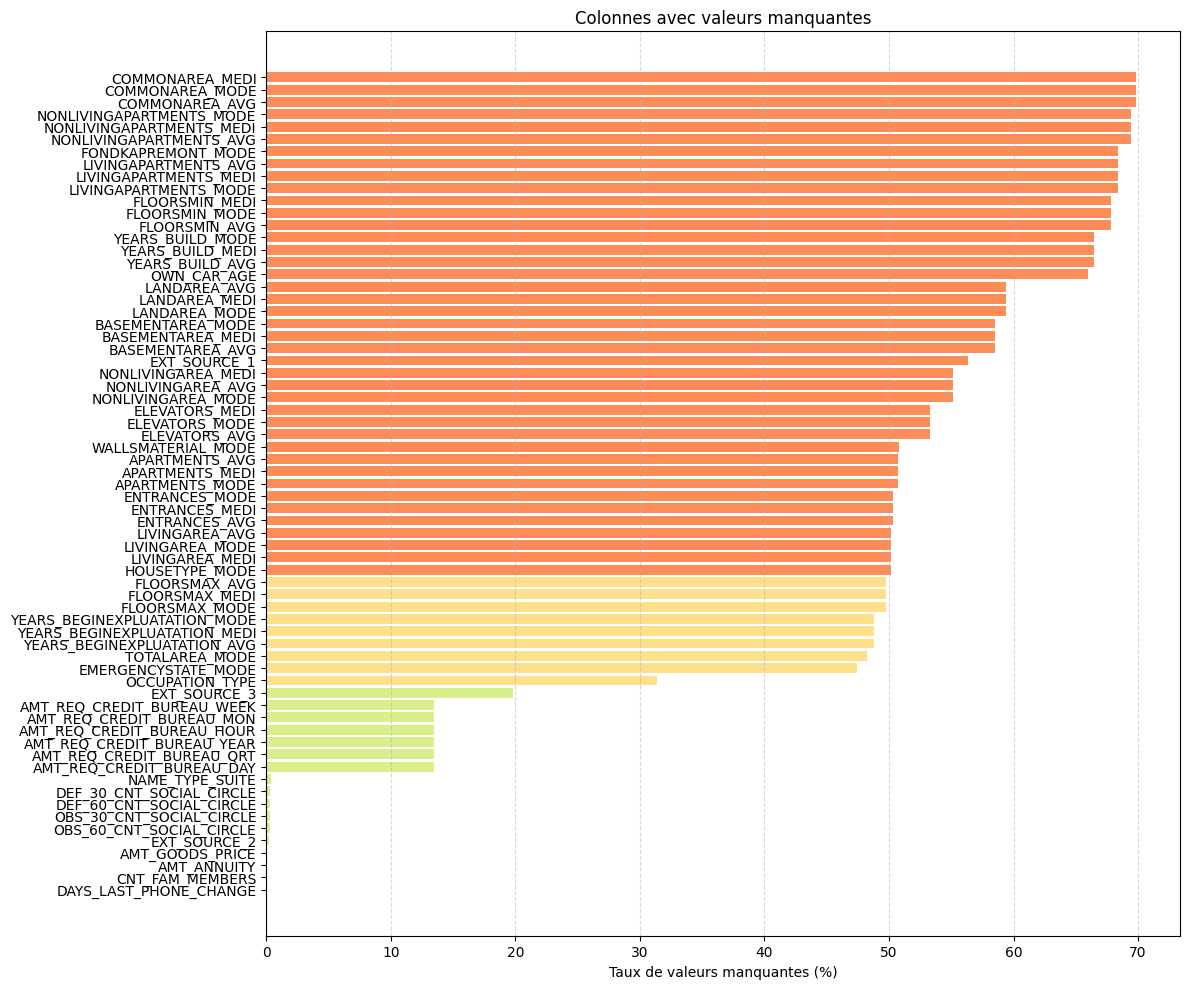

In [51]:
plot_missing_values(app_train, figsize=(12,10))

On supprime les colonnes qui contiennent plus de 40% de valeurs manquantes, en effet ces colonnes donnent principalement des informations sur la taille de l'habitation du propriétaire et ce n'est pas forcement pertinent.

In [52]:
app_train, app_train_colonnes_supprimees = supprimer_colonnes_trop_vides(app_train, seuil=40)

🧹 Colonnes supprimées (>40% de valeurs manquantes) :
  - OWN_CAR_AGE
  - EXT_SOURCE_1
  - APARTMENTS_AVG
  - BASEMENTAREA_AVG
  - YEARS_BEGINEXPLUATATION_AVG
  - YEARS_BUILD_AVG
  - COMMONAREA_AVG
  - ELEVATORS_AVG
  - ENTRANCES_AVG
  - FLOORSMAX_AVG
  - FLOORSMIN_AVG
  - LANDAREA_AVG
  - LIVINGAPARTMENTS_AVG
  - LIVINGAREA_AVG
  - NONLIVINGAPARTMENTS_AVG
  - NONLIVINGAREA_AVG
  - APARTMENTS_MODE
  - BASEMENTAREA_MODE
  - YEARS_BEGINEXPLUATATION_MODE
  - YEARS_BUILD_MODE
  - COMMONAREA_MODE
  - ELEVATORS_MODE
  - ENTRANCES_MODE
  - FLOORSMAX_MODE
  - FLOORSMIN_MODE
  - LANDAREA_MODE
  - LIVINGAPARTMENTS_MODE
  - LIVINGAREA_MODE
  - NONLIVINGAPARTMENTS_MODE
  - NONLIVINGAREA_MODE
  - APARTMENTS_MEDI
  - BASEMENTAREA_MEDI
  - YEARS_BEGINEXPLUATATION_MEDI
  - YEARS_BUILD_MEDI
  - COMMONAREA_MEDI
  - ELEVATORS_MEDI
  - ENTRANCES_MEDI
  - FLOORSMAX_MEDI
  - FLOORSMIN_MEDI
  - LANDAREA_MEDI
  - LIVINGAPARTMENTS_MEDI
  - LIVINGAREA_MEDI
  - NONLIVINGAPARTMENTS_MEDI
  - NONLIVINGAREA_MEDI
  - 

On supprime les lignes qui sont vides sur plus de 40% des colonnes

In [53]:
app_train, app_train_lignes_supprimees = supprimer_lignes_trop_vides(app_train, seuil=40)

🧹 Lignes supprimées (>40% de colonnes manquantes) : 0 lignes


On impute les valeurs manquantes : si c'est float on prend la moyenne, si c'est int on fait la moyenne qu'on arrondit et si c'est object on prend la valeur la plus fréquente

In [54]:
app_train, app_train_imputations = imputer_valeurs_manquantes(app_train)

c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\src\preprocessing.py:234: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(valeur, inplace=True)
c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\src\preprocessing.py:245: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

🧩 Imputation des valeurs manquantes effectuée :
  - AMT_ANNUITY : float → moyenne = 27108.57
  - AMT_GOODS_PRICE : float → moyenne = 538396.21
  - NAME_TYPE_SUITE : object → mode = Unaccompanied
  - OCCUPATION_TYPE : object → mode = Laborers
  - CNT_FAM_MEMBERS : float → moyenne = 2.15
  - EXT_SOURCE_2 : float → moyenne = 0.51
  - EXT_SOURCE_3 : float → moyenne = 0.51
  - OBS_30_CNT_SOCIAL_CIRCLE : float → moyenne = 1.42
  - DEF_30_CNT_SOCIAL_CIRCLE : float → moyenne = 0.14
  - OBS_60_CNT_SOCIAL_CIRCLE : float → moyenne = 1.41
  - DEF_60_CNT_SOCIAL_CIRCLE : float → moyenne = 0.10
  - DAYS_LAST_PHONE_CHANGE : float → moyenne = -962.86
  - AMT_REQ_CREDIT_BUREAU_HOUR : float → moyenne = 0.01
  - AMT_REQ_CREDIT_BUREAU_DAY : float → moyenne = 0.01
  - AMT_REQ_CREDIT_BUREAU_WEEK : float → moyenne = 0.03
  - AMT_REQ_CREDIT_BUREAU_MON : float → moyenne = 0.27
  - AMT_REQ_CREDIT_BUREAU_QRT : float → moyenne = 0.27
  - AMT_REQ_CREDIT_BUREAU_YEAR : float → moyenne = 1.90


On convertit certaines colonnes en int car c'est plus pertinent

In [55]:
colonnes_a_convertir_en_int = [
    'CNT_FAM_MEMBERS',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

for col in colonnes_a_convertir_en_int:
    app_train[col] = app_train[col].astype(int)


On convertit certaines colonnnes en object car c'est plus pertinent, notamment les flags

In [56]:
app_train, app_train_colonnes_binaires = convertir_binaires_en_object(app_train)

🔁 Colonnes binaires ou constantes converties en 'object' (hors ['TARGET']) :
['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']


On regroupe certaines valeurs pour les colonnes qui contiennent beaucoup de valeurs uniques afin que ce soit plus pertinent

In [57]:
afficher_valeurs_uniques_objet(app_train, seuil=2, nom_df='application_train')

🔍 Analyse des colonnes 'object' de application_train avec > 2 valeurs uniques :

🔸 CODE_GENDER (3 valeurs uniques) :
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
------------------------------------------------------------
🔸 NAME_TYPE_SUITE (7 valeurs uniques) :
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
------------------------------------------------------------
🔸 NAME_INCOME_TYPE (8 valeurs uniques) :
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
------------------------------------------------------------
🔸 NAME_EDUCATION_TYPE (5

In [58]:
app_train = nettoyer_colonnes_categorielles_application(app_train)

On reduit le type des données pour alléger la mémoire

In [59]:
app_train, app_train_conversions = reduire_types(app_train)

📉 Colonnes converties (types numériques uniquement) :
  - SK_ID_CURR : int64 → int32
  - TARGET : int64 → int8
  - CNT_CHILDREN : int64 → int8
  - DAYS_BIRTH : int64 → int16
  - DAYS_EMPLOYED : int64 → int32
  - DAYS_ID_PUBLISH : int64 → int16
  - CNT_FAM_MEMBERS : int64 → int8
  - REGION_RATING_CLIENT : int64 → int8
  - REGION_RATING_CLIENT_W_CITY : int64 → int8
  - HOUR_APPR_PROCESS_START : int64 → int8
  - OBS_30_CNT_SOCIAL_CIRCLE : int64 → int16
  - DEF_30_CNT_SOCIAL_CIRCLE : int64 → int8
  - OBS_60_CNT_SOCIAL_CIRCLE : int64 → int16
  - DEF_60_CNT_SOCIAL_CIRCLE : int64 → int8
  - AMT_REQ_CREDIT_BUREAU_HOUR : int64 → int8
  - AMT_REQ_CREDIT_BUREAU_DAY : int64 → int8
  - AMT_REQ_CREDIT_BUREAU_WEEK : int64 → int8
  - AMT_REQ_CREDIT_BUREAU_MON : int64 → int8
  - AMT_REQ_CREDIT_BUREAU_QRT : int64 → int16
  - AMT_REQ_CREDIT_BUREAU_YEAR : int64 → int8
  - AMT_INCOME_TOTAL : float64 → float32
  - AMT_CREDIT : float64 → float32
  - AMT_ANNUITY : float64 → float32
  - AMT_GOODS_PRICE : float

In [60]:
analyse_app = analyser_donnees_interactive(app_train)
analyse_app

interactive(children=(IntSlider(value=0, description='Page', max=7), Output()), _dom_classes=('widget-interact…

## Bureau

In [21]:
bureau = data['bureau']

In [30]:
analyse_bureau = analyser_donnees_interactive(bureau)
analyse_bureau

interactive(children=(IntSlider(value=0, description='Page', max=1), Output()), _dom_classes=('widget-interact…

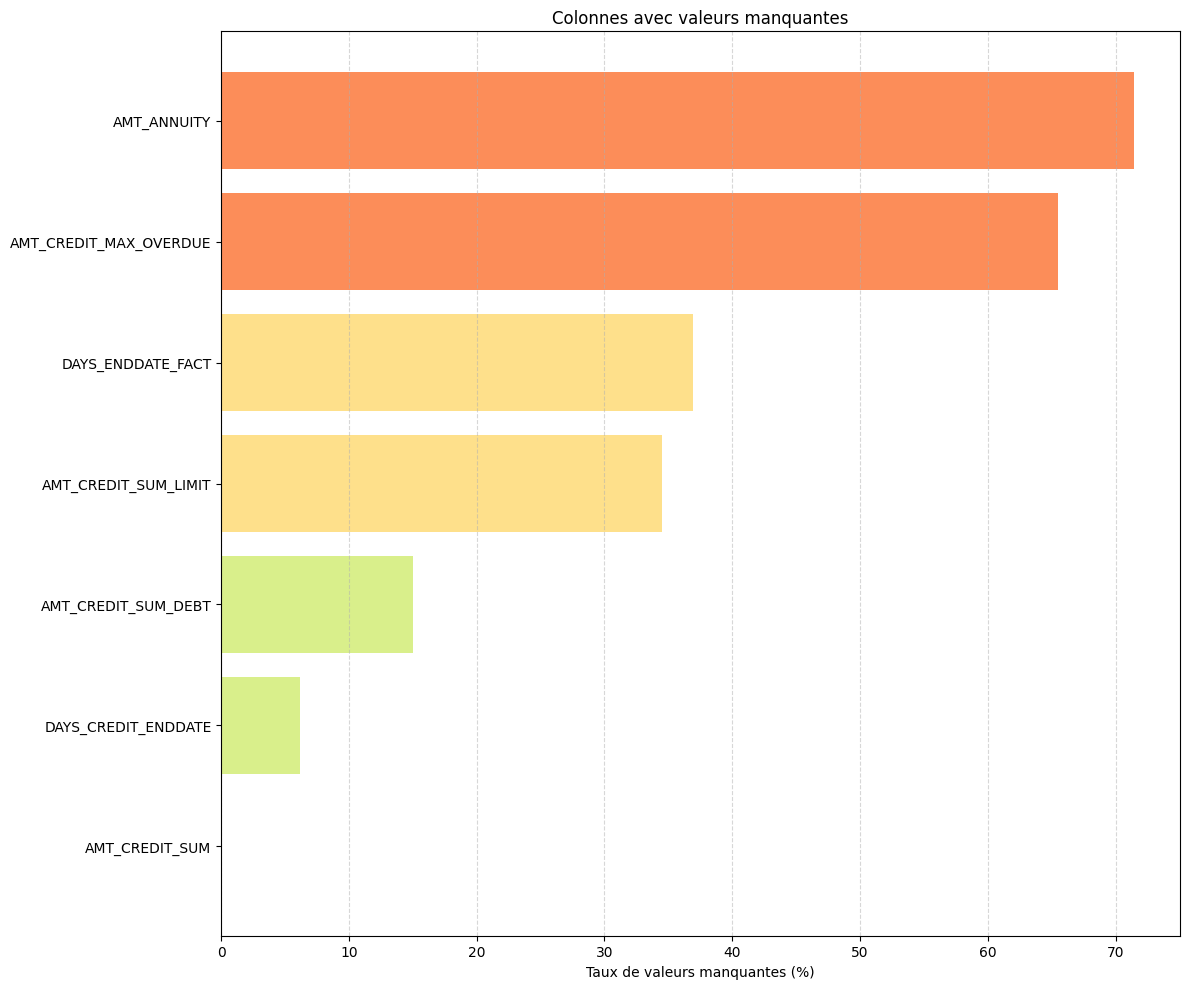

In [31]:
plot_missing_values(bureau, figsize=(12,10))

In [32]:
verifier_unicite_id(bureau, id_col='SK_ID_CURR', nom_df='bureau')

📊 Vérification pour bureau
Nombre de lignes          : 1716428
Nombre d'identifiants uniques : 305811
⚠️ Il y a PLUSIEURS lignes par client (identifiant non unique).


False

Les colonnes AMT_CREDIT_MAX_OVERDUE et AMT_ANNUITY du fichier bureau.csv ont été supprimées car elles sont trop incomplètes (>60 % de valeurs manquantes) et redondantes avec des variables plus fiables.

In [33]:
bureau, bureau_colonnes_supprimees = supprimer_colonnes_trop_vides(bureau, seuil=40)

🧹 Colonnes supprimées (>40% de valeurs manquantes) :
  - AMT_CREDIT_MAX_OVERDUE
  - AMT_ANNUITY


In [34]:
bureau, bureau_lignes_supprimees = supprimer_lignes_trop_vides(bureau, seuil=40)

🧹 Lignes supprimées (>40% de colonnes manquantes) : 0 lignes


In [35]:
bureau, bureau_imputations = imputer_valeurs_manquantes(bureau)

c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\src\preprocessing.py:234: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(valeur, inplace=True)


🧩 Imputation des valeurs manquantes effectuée :
  - DAYS_CREDIT_ENDDATE : float → moyenne = 510.52
  - DAYS_ENDDATE_FACT : float → moyenne = -1017.44
  - AMT_CREDIT_SUM : float → moyenne = 354994.59
  - AMT_CREDIT_SUM_DEBT : float → moyenne = 137085.12
  - AMT_CREDIT_SUM_LIMIT : float → moyenne = 6229.51


In [36]:
bureau[['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT']] = bureau[['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT']].astype('int32')

In [37]:
afficher_valeurs_uniques_objet(bureau, seuil=2, nom_df='bureau')

🔍 Analyse des colonnes 'object' de bureau avec > 2 valeurs uniques :

🔸 CREDIT_ACTIVE (4 valeurs uniques) :
CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64
------------------------------------------------------------
🔸 CREDIT_CURRENCY (4 valeurs uniques) :
CREDIT_CURRENCY
currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: count, dtype: int64
------------------------------------------------------------
🔸 CREDIT_TYPE (15 valeurs uniques) :
CREDIT_TYPE
Consumer credit                                 1251615
Credit card                                      402195
Car loan                                          27690
Mortgage                                          18391
Microloan                                         12413
Loan for business development                      1975
Another type of loan                               1017
Unknown type of loan                   

In [38]:
bureau = nettoyer_colonnes_categorielles_bureau(bureau)

In [39]:
bureau, bureau_conversions = reduire_types(bureau)

📉 Colonnes converties (types numériques uniquement) :
  - SK_ID_CURR : int64 → int32
  - SK_ID_BUREAU : int64 → int32
  - DAYS_CREDIT : int64 → int16
  - CREDIT_DAY_OVERDUE : int64 → int16
  - CNT_CREDIT_PROLONG : int64 → int8
  - DAYS_CREDIT_UPDATE : int64 → int32
  - AMT_CREDIT_SUM : float64 → float32
  - AMT_CREDIT_SUM_DEBT : float64 → float32
  - AMT_CREDIT_SUM_LIMIT : float64 → float32
  - AMT_CREDIT_SUM_OVERDUE : float64 → float32


In [40]:
analyse_bureau = analyser_donnees_interactive(bureau)
analyse_bureau

interactive(children=(IntSlider(value=0, description='Page', max=1), Output()), _dom_classes=('widget-interact…

## Bureau balance

In [41]:
bureau_balance = data['bureau_balance']

In [42]:
analyse_bureau_balance = analyser_donnees_interactive(bureau_balance)

interactive(children=(IntSlider(value=0, description='Page', max=0), Output()), _dom_classes=('widget-interact…

In [43]:
verifier_unicite_id(bureau_balance, id_col='SK_ID_BUREAU', nom_df='bureau_balance')

📊 Vérification pour bureau_balance
Nombre de lignes          : 27299925
Nombre d'identifiants uniques : 817395
⚠️ Il y a PLUSIEURS lignes par client (identifiant non unique).


False

Le fichier bureau_balance.csv ne sera pas été intégré au modèle car il présente une structure très granulaire (plusieurs lignes par mois et par crédit), rendant son exploitation complexe et coûteuse en temps de traitement. Par ailleurs, les informations qu’il contient sur les retards ou clôtures de crédits sont en grande partie déjà résumées dans le fichier bureau.csv, via des variables comme CREDIT_DAY_OVERDUE, AMT_CREDIT_SUM_DEBT, ou CREDIT_TYPE. Son exclusion permet donc de simplifier le pipeline sans perte significative d’information.

## Credit card balance

In [44]:
credit_card_balance = data['credit_card_balance']

In [45]:
analyse_credit_card_balance = analyser_donnees_interactive(credit_card_balance)

interactive(children=(IntSlider(value=0, description='Page', max=2), Output()), _dom_classes=('widget-interact…

In [46]:
verifier_unicite_id(credit_card_balance, id_col='SK_ID_CURR', nom_df='credit_card_balance')

📊 Vérification pour credit_card_balance
Nombre de lignes          : 3840312
Nombre d'identifiants uniques : 103558
⚠️ Il y a PLUSIEURS lignes par client (identifiant non unique).


False

Le fichier credit_card_balance.csv n’a pas été retenu car il présente une structure temporelle complexe, avec plusieurs lignes par client et par mois. Son intégration nécessite des agrégations spécifiques et un prétraitement avancé pour en extraire des variables pertinentes. Par souci de clarté, d’efficacité et de performance du pipeline, ce fichier a été écarté au profit de sources de données plus directement exploitables comme bureau et previous_application, qui contiennent déjà des informations comportementales robustes sur l’historique de crédit.

## Installments payments

In [47]:
installments_payments = data['installments_payments']

In [48]:
analyse_installments_payments = analyser_donnees_interactive(installments_payments)

interactive(children=(IntSlider(value=0, description='Page', max=0), Output()), _dom_classes=('widget-interact…

In [49]:
verifier_unicite_id(credit_card_balance, id_col='SK_ID_CURR', nom_df='credit_card_balance')

📊 Vérification pour credit_card_balance
Nombre de lignes          : 3840312
Nombre d'identifiants uniques : 103558
⚠️ Il y a PLUSIEURS lignes par client (identifiant non unique).


False

Le fichier installments_payments.csv ne sera pas intégré à modèle, car il présente un très grand nombre de lignes par client, nécessitant des agrégations avancées pour en extraire des variables significatives. De plus, les informations qu’il contient (montants remboursés, retards de paiement) sont déjà partiellement résumées dans les variables du fichier previous_application. Son exclusion permet donc de réduire la complexité du pipeline sans perte critique d'information

## POS CASH balance

In [50]:
POS_CASH_balance = data['POS_CASH_balance']

In [51]:
analyse_POS_CASH_balance = analyser_donnees_interactive(POS_CASH_balance)

interactive(children=(IntSlider(value=0, description='Page', max=0), Output()), _dom_classes=('widget-interact…

In [52]:
verifier_unicite_id(credit_card_balance, id_col='SK_ID_CURR', nom_df='credit_card_balance')

📊 Vérification pour credit_card_balance
Nombre de lignes          : 3840312
Nombre d'identifiants uniques : 103558
⚠️ Il y a PLUSIEURS lignes par client (identifiant non unique).


False

Le fichier POS_CASH_balance.csv ne sera pas été intégré au modèle. Il contient un historique mensuel très détaillé sur les crédits passés, mais ses informations sont en grande partie redondantes avec celles du fichier previous_application. De plus, il nécessite des traitements lourds pour produire des variables exploitables. Sa complexité ne justifiant pas sa valeur ajoutée, il a été écarté afin de simplifier et fiabiliser le pipeline.

## Previous application

In [16]:
previous_application = data['previous_application']

In [17]:
analyse_previous_application = analyser_donnees_interactive(previous_application)

interactive(children=(IntSlider(value=0, description='Page', max=3), Output()), _dom_classes=('widget-interact…

In [18]:
verifier_unicite_id(previous_application, id_col='SK_ID_CURR', nom_df='previous_application')

📊 Vérification pour previous_application
Nombre de lignes          : 1670214
Nombre d'identifiants uniques : 338857
⚠️ Il y a PLUSIEURS lignes par client (identifiant non unique).


False

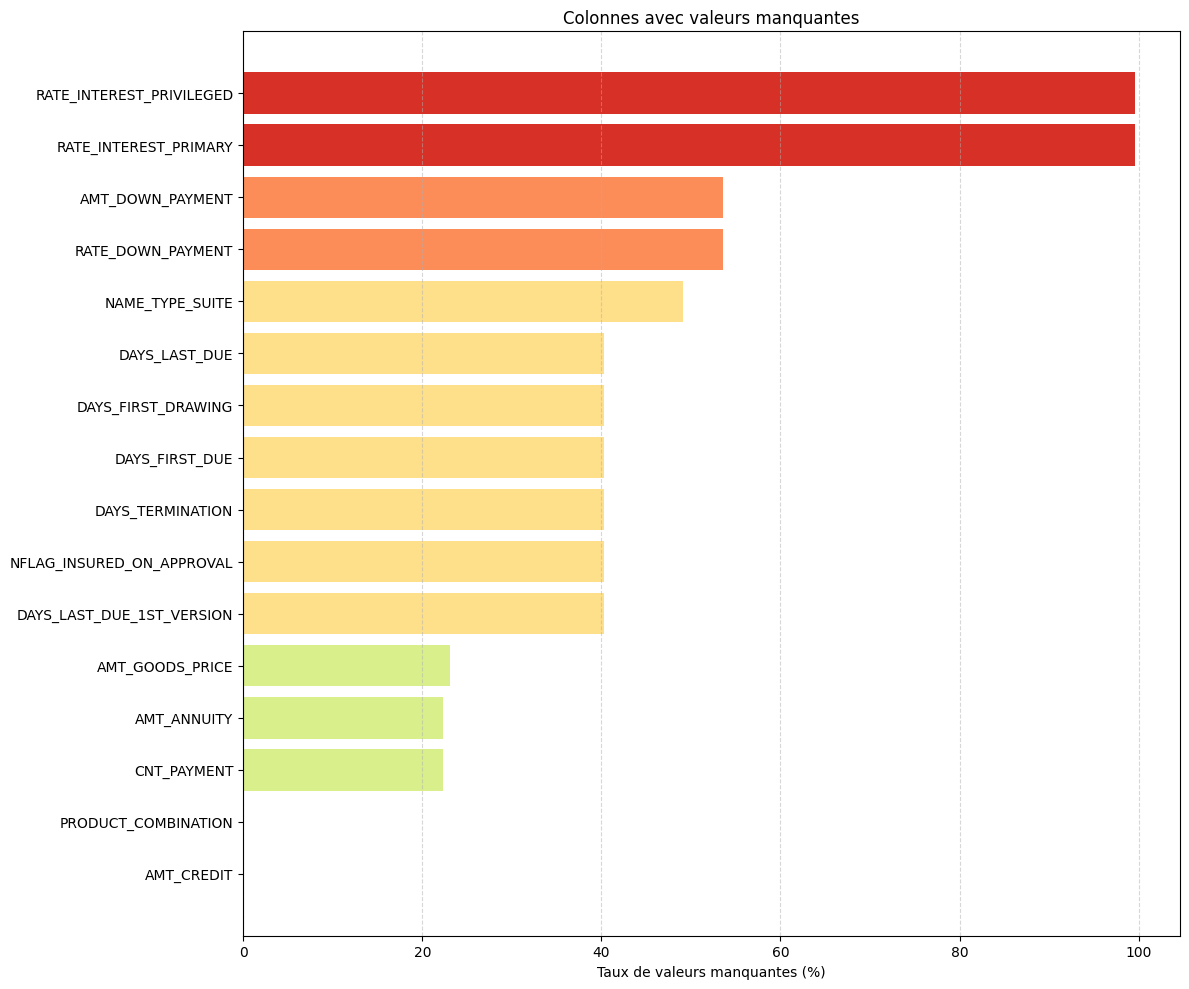

In [19]:
plot_missing_values(previous_application, figsize=(12,10))

In [20]:
previous_application, previous_application_colonnes_supprimees = supprimer_colonnes_trop_vides(previous_application, seuil=45)

🧹 Colonnes supprimées (>45% de valeurs manquantes) :
  - AMT_DOWN_PAYMENT
  - RATE_DOWN_PAYMENT
  - RATE_INTEREST_PRIMARY
  - RATE_INTEREST_PRIVILEGED
  - NAME_TYPE_SUITE


In [21]:
previous_application, previous_application_lignes_supprimees = supprimer_lignes_trop_vides(previous_application, seuil=40)

🧹 Lignes supprimées (>40% de colonnes manquantes) : 0 lignes


In [22]:
previous_application, previous_application_imputations = imputer_valeurs_manquantes(previous_application)

c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\src\preprocessing.py:234: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(valeur, inplace=True)
c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\src\preprocessing.py:245: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

🧩 Imputation des valeurs manquantes effectuée :
  - AMT_ANNUITY : float → moyenne = 15955.12
  - AMT_CREDIT : float → moyenne = 196114.02
  - AMT_GOODS_PRICE : float → moyenne = 227847.28
  - CNT_PAYMENT : float → moyenne = 16.05
  - PRODUCT_COMBINATION : object → mode = Cash
  - DAYS_FIRST_DRAWING : float → moyenne = 342209.86
  - DAYS_FIRST_DUE : float → moyenne = 13826.27
  - DAYS_LAST_DUE_1ST_VERSION : float → moyenne = 33767.77
  - DAYS_LAST_DUE : float → moyenne = 76582.40
  - DAYS_TERMINATION : float → moyenne = 81992.34
  - NFLAG_INSURED_ON_APPROVAL : float → moyenne = 0.33


In [23]:
colonnes_a_convertir_int = [
    'CNT_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA',
    'NFLAG_LAST_APPL_IN_DAY', 'NFLAG_MICRO_CASH', 'NFLAG_INSURED_ON_APPROVAL'
]

for col in colonnes_a_convertir_int:
    if col in previous_application.columns:
        previous_application[col] = previous_application[col].fillna(0).astype(int)


In [24]:
previous_application, previous_application_colonnes_binaires = convertir_binaires_en_object(previous_application)

🔁 Colonnes binaires ou constantes converties en 'object' (hors ['TARGET']) :
['NFLAG_LAST_APPL_IN_DAY', 'NFLAG_INSURED_ON_APPROVAL']


In [25]:
afficher_valeurs_uniques_objet(previous_application, seuil=2, nom_df='previous_application')

🔍 Analyse des colonnes 'object' de previous_application avec > 2 valeurs uniques :

🔸 NAME_CONTRACT_TYPE (4 valeurs uniques) :
NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64
------------------------------------------------------------
🔸 WEEKDAY_APPR_PROCESS_START (7 valeurs uniques) :
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64
------------------------------------------------------------
🔸 NAME_CASH_LOAN_PURPOSE (25 valeurs uniques) :
NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex 

In [26]:
previous_application = nettoyer_colonnes_categorielles_previous(previous_application)

In [27]:
previous_application, previous_application_conversions = reduire_types(previous_application)

📉 Colonnes converties (types numériques uniquement) :
  - SK_ID_PREV : int64 → int32
  - SK_ID_CURR : int64 → int32
  - HOUR_APPR_PROCESS_START : int64 → int8
  - DAYS_DECISION : int64 → int16
  - SELLERPLACE_AREA : int64 → int32
  - CNT_PAYMENT : int64 → int8
  - AMT_ANNUITY : float64 → float32
  - AMT_APPLICATION : float64 → float32
  - AMT_CREDIT : float64 → float32
  - AMT_GOODS_PRICE : float64 → float32
  - DAYS_FIRST_DRAWING : float64 → float32
  - DAYS_FIRST_DUE : float64 → float32
  - DAYS_LAST_DUE_1ST_VERSION : float64 → float32
  - DAYS_LAST_DUE : float64 → float32
  - DAYS_TERMINATION : float64 → float32


In [28]:
analyse_previous_application = analyser_donnees_interactive(previous_application)

interactive(children=(IntSlider(value=0, description='Page', max=3), Output()), _dom_classes=('widget-interact…

# Fusion des données et feature engineering 

Pour l'entraînement du modèle de scoring crédit, nous avons choisi de n'utiliser que trois sources de données : application_train, bureau et previous_application.
Ce choix repose sur plusieurs critères : la richesse des informations contenues dans ces jeux de données, leur lien direct avec le profil et l'historique de crédit des clients, ainsi que leur qualité (taux de remplissage acceptable, structure exploitable).
D'autres fichiers comme credit_card_balance, installments_payments, POS_CASH_balance ou bureau_balance contiennent des informations très granulaires ou redondantes, souvent difficiles à agréger sans perte d'information ou forte complexité.
En se concentrant sur les trois jeux de données les plus pertinents, nous assurons un bon compromis entre richesse informative et efficacité de traitement.

In [66]:
# 📘 Colonnes conservées dans application_train
print(f"\n📘 Colonnes conservées dans 'application_train' ({len(app_train.columns)} colonnes) :")
sorted(app_train.columns.tolist())


📘 Colonnes conservées dans 'application_train' (73 colonnes) :


['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_OWN_CAR',

In [67]:
# 📘 Colonnes conservées dans bureau
print(f"\n📘 Colonnes conservées dans 'bureau' ({len(bureau.columns)} colonnes) :")
sorted(bureau.columns.tolist())


📘 Colonnes conservées dans 'bureau' (15 colonnes) :


['AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'CREDIT_ACTIVE',
 'CREDIT_CURRENCY',
 'CREDIT_DAY_OVERDUE',
 'CREDIT_TYPE',
 'DAYS_CREDIT',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_CREDIT_UPDATE',
 'DAYS_ENDDATE_FACT',
 'SK_ID_BUREAU',
 'SK_ID_CURR']

In [68]:
# 📘 Colonnes conservées dans previous_application
print(f"\n📘 Colonnes conservées dans 'previous_application' ({len(previous_application.columns)} colonnes) :")
sorted(previous_application.columns.tolist())


📘 Colonnes conservées dans 'previous_application' (32 colonnes) :


['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CHANNEL_TYPE',
 'CNT_PAYMENT',
 'CODE_REJECT_REASON',
 'DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_TERMINATION',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'HOUR_APPR_PROCESS_START',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CLIENT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_CONTRACT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'NFLAG_INSURED_ON_APPROVAL',
 'NFLAG_LAST_APPL_IN_DAY',
 'PRODUCT_COMBINATION',
 'SELLERPLACE_AREA',
 'SK_ID_CURR',
 'SK_ID_PREV',
 'WEEKDAY_APPR_PROCESS_START']

In [69]:
from src.feature_engineering import fusionner_et_agreger_donnees
from src.feature_engineering import feature_engineering_bureau, feature_engineering_previous

Objectif : Enrichir notre jeu de données principal (application_train) avec des informations provenant de deux sources secondaires : bureau et previous_application, tout en assurant que chaque client (SK_ID_CURR) soit représenté par une seule ligne contenant des caractéristiques agrégées.

Étapes du Feature Engineering :

- Encodage des variables catégorielles
- On applique un one-hot encoding à toutes les colonnes de type object pour les transformer en colonnes numériques binaires. Cela permet de rendre les variables catégorielles exploitables par les modèles de machine learning.

Agrégation des données secondaires par client
Pour chaque client (SK_ID_CURR) :

- On regroupe les données issues de bureau et previous_application.

- On calcule des statistiques agrégées sur les colonnes numériques : min, max, mean, sum, var.

- Pour les colonnes catégorielles (après encodage), on effectue une moyenne qui donne une proportion de chaque modalité (par exemple : NAME_CONTRACT_TYPE_Cash = 0.6 signifie que 60 % des crédits d’un client étaient de type Cash).

Création de nouvelles features

- Ex. : le ratio AMT_APPLICATION / AMT_CREDIT est une variable informative sur le comportement d’un client.

Fusion finale
- On fusionne les données agrégées avec application_train via SK_ID_CURR. Ainsi, chaque ligne du jeu final représente un client enrichi de toutes les informations historiques utiles.

In [70]:
# Fusion et feature engineering
df_final = fusionner_et_agreger_donnees(app_train, bureau, previous_application)

In [71]:
df_final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,...,PREV_NAME_GOODS_CATEGORY_Other_MEAN,PREV_NAME_GOODS_CATEGORY_Photo / Cinema Equipment_MEAN,PREV_NAME_GOODS_CATEGORY_Sport and Leisure_MEAN,PREV_NAME_GOODS_CATEGORY_Tourism_MEAN,PREV_NAME_GOODS_CATEGORY_Unknown_MEAN,PREV_NAME_GOODS_CATEGORY_Vehicles_MEAN,PREV_NAME_GOODS_CATEGORY_nan_MEAN,PREV_NAME_PORTFOLIO_Cards_MEAN,PREV_NAME_PORTFOLIO_Cars_MEAN,PREV_NAME_PORTFOLIO_Cash_MEAN,PREV_NAME_PORTFOLIO_POS_MEAN,PREV_NAME_PORTFOLIO_Unknown_MEAN,PREV_NAME_PORTFOLIO_nan_MEAN,PREV_NAME_PRODUCT_TYPE_Unknown_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_PRODUCT_TYPE_x-sell_MEAN,PREV_NAME_PRODUCT_TYPE_nan_MEAN,PREV_CHANNEL_TYPE_AP+ (Cash loan)_MEAN,PREV_CHANNEL_TYPE_Contact center_MEAN,PREV_CHANNEL_TYPE_Country-wide_MEAN,PREV_CHANNEL_TYPE_Credit and cash offices_MEAN,PREV_CHANNEL_TYPE_Other_MEAN,PREV_CHANNEL_TYPE_Regional / Local_MEAN,PREV_CHANNEL_TYPE_Stone_MEAN,PREV_CHANNEL_TYPE_nan_MEAN,PREV_NAME_SELLER_INDUSTRY_Auto technology_MEAN,PREV_NAME_SELLER_INDUSTRY_Clothing_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_SELLER_INDUSTRY_Construction_MEAN,PREV_NAME_SELLER_INDUSTRY_Consumer electronics_MEAN,PREV_NAME_SELLER_INDUSTRY_Furniture_MEAN,PREV_NAME_SELLER_INDUSTRY_Industry_MEAN,PREV_NAME_SELLER_INDUSTRY_Jewelry_MEAN,PREV_NAME_SELLER_INDUSTRY_MLM partners_MEAN,PREV_NAME_SELLER_INDUSTRY_Tourism_MEAN,PREV_NAME_SELLER_INDUSTRY_Unknown_MEAN,PREV_NAME_SELLER_INDUSTRY_nan_MEAN,PREV_NAME_YIELD_GROUP_Unknown_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_NAME_YIELD_GROUP_middle_MEAN,PREV_NAME_YIELD_GROUP_nan_MEAN,PREV_PRODUCT_COMBINATION_Card_MEAN,PREV_PRODUCT_COMBINATION_Cash_MEAN,PREV_PRODUCT_COMBINATION_POS_MEAN,PREV_PRODUCT_COMBINATION_nan_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_0.0_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_1.0_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_nan_MEAN
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Labor,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business,0.262949,0.139376,2,2,2,2,-1134.0,0,1,0,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,1.000000,0.000000,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Administrative,2,1,1,MONDAY,11,0,0,0,0,0,0,Education,0.622246,0.510853,1,0,1,0,-828.0,0,1,0,...,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.000000,0.0,0.333333,0.666667,0.000000,0.0,0.666667,0.000000,0.333333,0.0,0.000000,0.0,0.333333,0.333333,0.0,0.000000,0.333333,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.333333,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.000000,0.0,0.333333,0.666667,0.0,0.000000,0.333333,0.666667,0.0,0.333333,0.666667,0.0
2,100004,0,Revolving l

In [72]:
analyse_df_final= analyser_donnees_interactive(df_final)

interactive(children=(IntSlider(value=0, description='Page', max=23), Output()), _dom_classes=('widget-interac…

In [73]:
# Remplissage des NaN par 0
df_final.fillna(0, inplace=True)

# Enregistrer le résultat si besoin
df_final.to_csv('C:/Users/inesn/OneDrive - Université de Paris/credit_score_projet7/data/modified/application_avec_features.csv', index=False)

# Matrice de corrélation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, normaltest, chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [2]:
# Chargement du dataset final
df = pd.read_csv("C:/Users/inesn/OneDrive - Université de Paris/credit_score_projet7/data/modified/application_avec_features.csv")

# Séparation des colonnes numériques et catégorielles
colonnes_numeriques = df.select_dtypes(include=[np.number]).drop(columns=['SK_ID_CURR']).columns
colonnes_categorielles = df.select_dtypes(include='object').columns

### Données numériques

In [3]:
# ====== 1. Matrice de corrélation des variables numériques ======

# Test de normalité + choix de Pearson ou Spearman
def calcul_corr_num_colonnes(df, colonnes, target='TARGET'):
    correlations = []
    for col in colonnes:
        if col == target or df[col].isnull().any():
            continue
        stat, p = normaltest(df[col].dropna())
        if p > 0.05:
            corr, _ = pearsonr(df[col].dropna(), df[target].dropna())
            methode = "pearson"
        else:
            corr, _ = spearmanr(df[col].dropna(), df[target].dropna())
            methode = "spearman"
        correlations.append((col, corr, methode))
    
    return pd.DataFrame(correlations, columns=['Feature', 'Correlation', 'Method']).sort_values(by='Correlation', key=abs, ascending=False)

corr_numerique_df = calcul_corr_num_colonnes(df, colonnes_numeriques)

C:\Users\inesn\AppData\Local\Temp\ipykernel_17400\2199481950.py:14: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = spearmanr(df[col].dropna(), df[target].dropna())


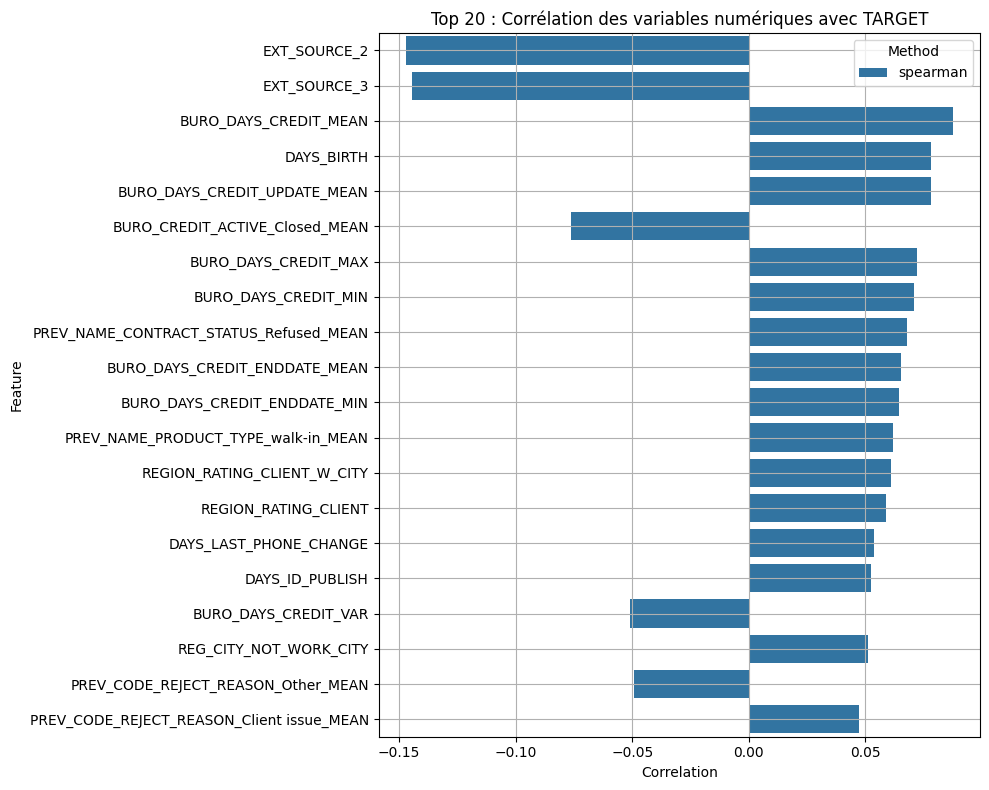

In [4]:
# Barplot des corrélations numériques
top_corr = corr_numerique_df.head(20)
plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation', y='Feature', hue='Method', data=top_corr)
plt.title("Top 20 : Corrélation des variables numériques avec TARGET")
plt.grid(True)
plt.tight_layout()
plt.show()

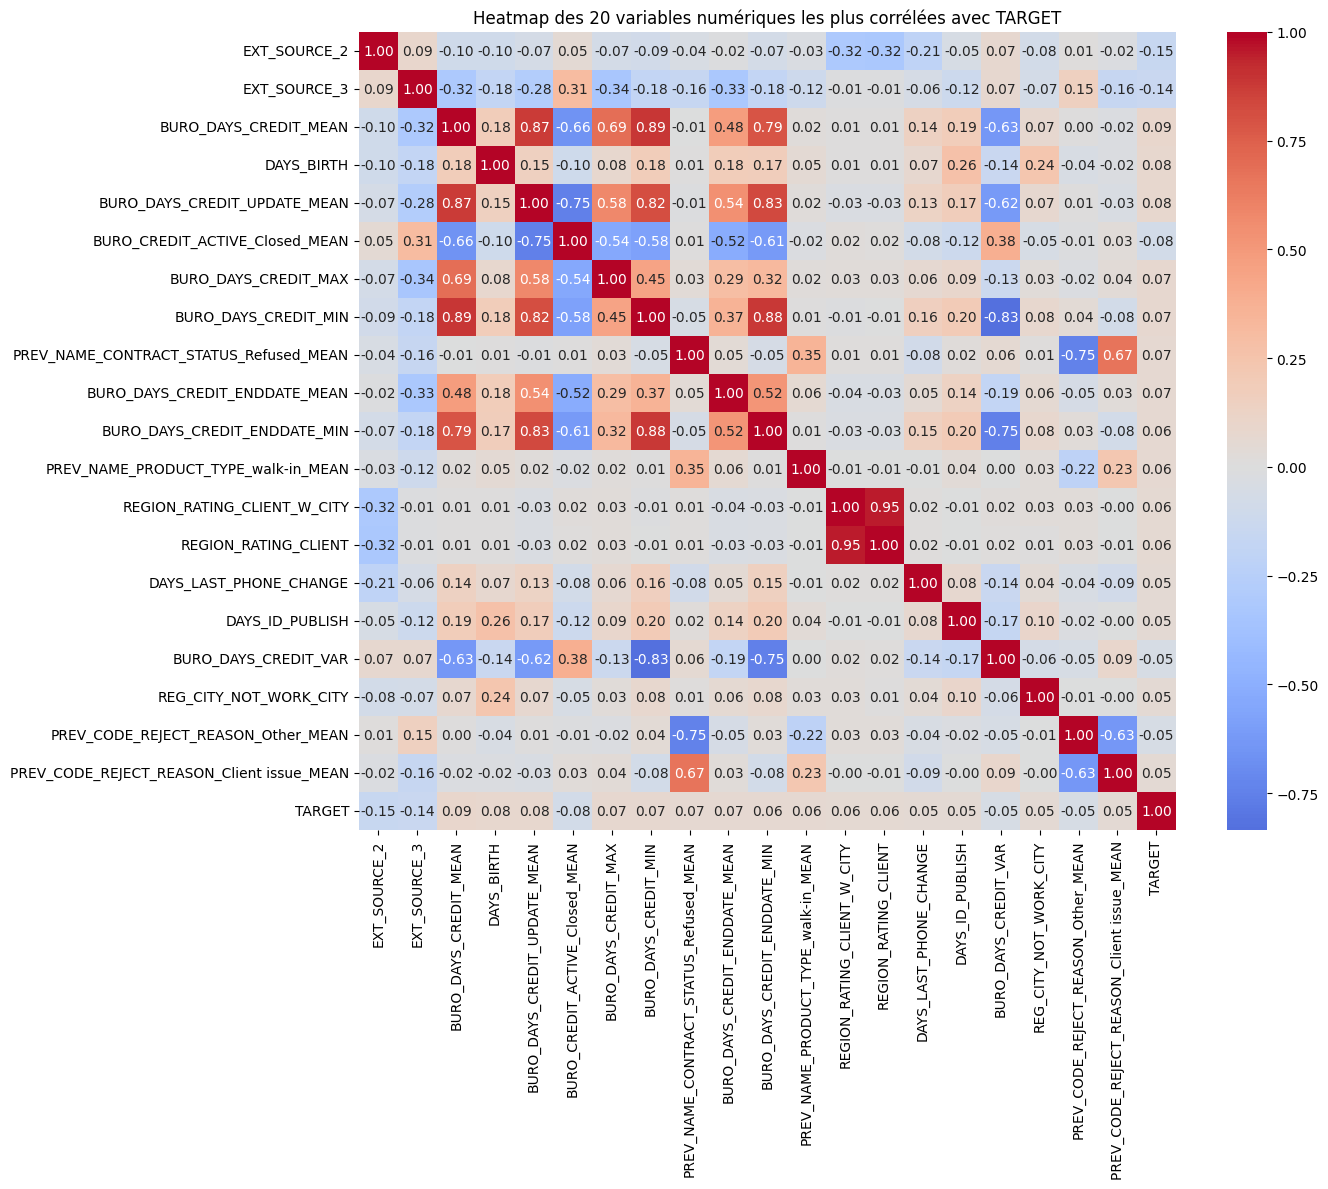

In [5]:
# Heatmap des 20 variables numériques les plus corrélées
top_features = corr_numerique_df['Feature'].head(20).tolist()
corr_matrix = df[top_features + ['TARGET']].corr(method='spearman')  # ou pearson selon besoin

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Heatmap des 20 variables numériques les plus corrélées avec TARGET")
plt.tight_layout()
plt.show()

### Données catégorielles

In [6]:
# ====== 2. Matrice de corrélation catégorielle (V de Cramér) ======

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] < 2 or confusion_matrix.shape[1] < 2:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [7]:
# Calcul du V de Cramér
cramer_results = []
for col in colonnes_categorielles:
    if df[col].isnull().any():
        continue
    v = cramers_v(df[col], df['TARGET'])
    cramer_results.append((col, v))

cramer_df = pd.DataFrame(cramer_results, columns=['Feature', 'CramersV']).sort_values(by='CramersV', ascending=False)

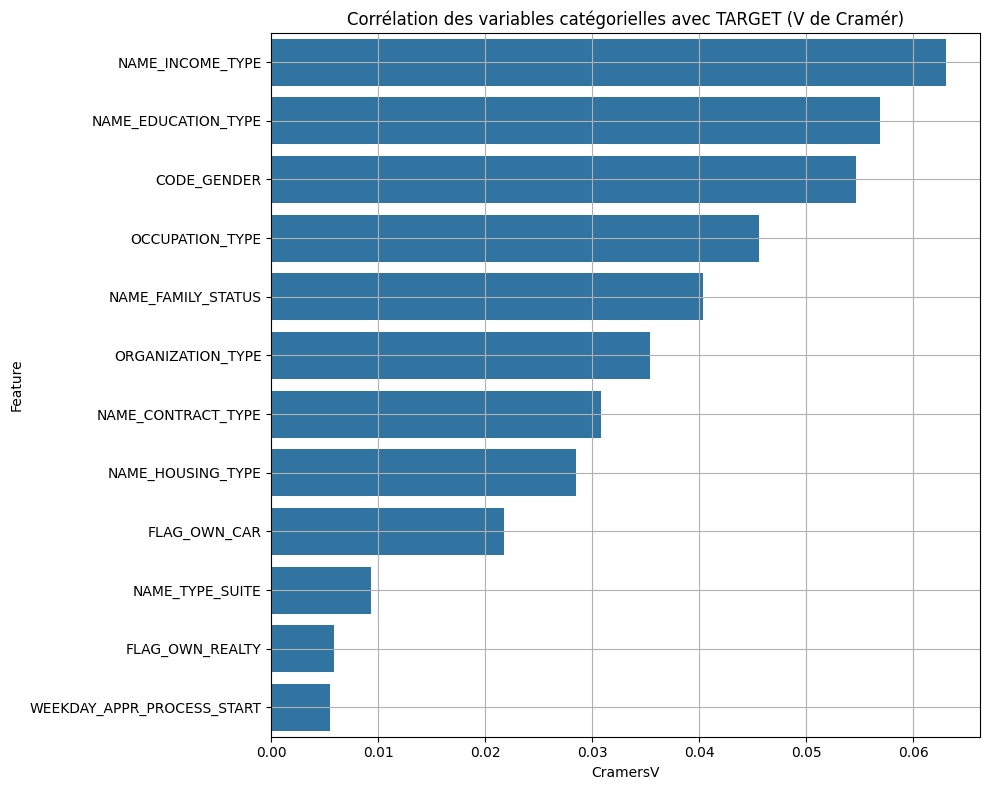

In [8]:
# Barplot V de Cramér
plt.figure(figsize=(10, 8))
sns.barplot(x='CramersV', y='Feature', data=cramer_df)
plt.title("Corrélation des variables catégorielles avec TARGET (V de Cramér)")
plt.grid(True)
plt.tight_layout()
plt.show()

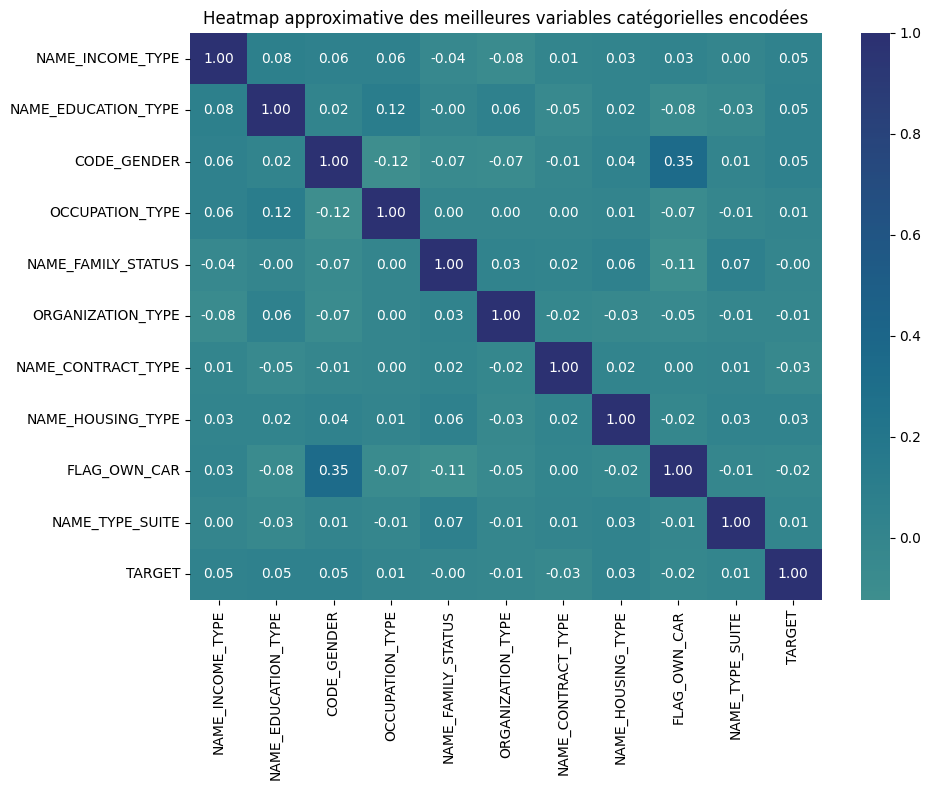

In [9]:
# Heatmap approximative sur les 10 meilleures variables catégorielles encodées
top_cat = cramer_df['Feature'].head(10).tolist()
df_encoded = df[top_cat + ['TARGET']].copy()

for col in top_cat:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

cat_corr = df_encoded.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(cat_corr, annot=True, fmt=".2f", cmap='crest', center=0)
plt.title("Heatmap approximative des meilleures variables catégorielles encodées")
plt.tight_layout()
plt.show()

Dans le cadre de notre projet, nous avons réalisé une analyse de corrélation entre les différentes variables du dataset enrichi afin d’évaluer leur relation avec la variable cible (TARGET), mais aussi entre elles.

Nous avons constaté que certaines variables présentaient des corrélations modérées voire fortes entre elles. Toutefois, comme notre objectif est de résoudre un problème de classification (prédire si un client est à risque ou non), la présence de redondances entre certaines features n’est pas nécessairement problématique.

En effet :

- Les modèles d’apprentissage automatique comme LightGBM, XGBoost ou les forêts aléatoires sont capables de gérer la multicolinéarité et sélectionnent automatiquement les variables les plus pertinentes.

- Contrairement à la régression linéaire ou logistique, où la multicolinéarité peut fausser les coefficients, ce problème est beaucoup moins critique pour les modèles non-linéaires utilisés dans notre pipeline.

- Supprimer des variables uniquement sur la base de leur corrélation avec d’autres pourrait entraîner une perte d’information utile pour la classification, en particulier si ces variables sont informatives pour la prédiction de TARGET.

Ainsi, nous avons fait le choix de ne pas supprimer systématiquement les variables corrélées entre elles, sauf en cas de problème avéré de surapprentissage ou de coût computationnel élevé. Nous priorisons l’évaluation empirique des performances (via validation croisée et métriques) pour guider une éventuelle sélection de variables par la suite.

# SMOTE

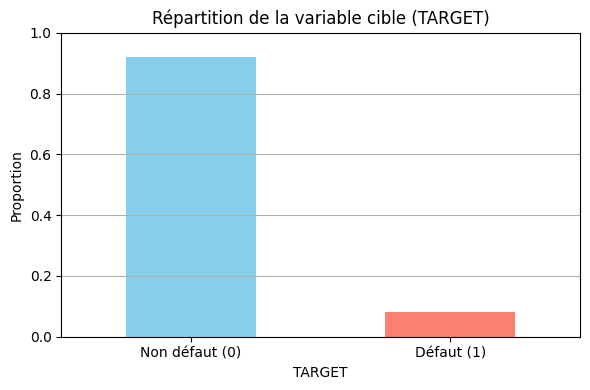

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualisation de la variable cible
target_counts = df["TARGET"].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Répartition de la variable cible (TARGET)")
plt.xticks([0, 1], labels=["Non défaut (0)", "Défaut (1)"], rotation=0)
plt.ylabel("Proportion")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Nettoyage des noms de colonnes : remplacer les caractères spéciaux et espaces
df.columns = (
    df.columns.str.strip()
              .str.replace('[^A-Za-z0-9_]+', '_', regex=True)
              .str.replace(' ', '_')
)

# Encodage des colonnes catégorielles restantes
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Remplacement des NaN et Inf par 0 (sécurité pour SMOTE)
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Séparation features / target
X = df.drop(columns=['SK_ID_CURR', 'TARGET'])
y = df['TARGET']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Application du SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Vérification
print("Distribution après SMOTE :")
print(y_train_res.value_counts(normalize=True))


c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Distribution après SMOTE :
TARGET
0    0.5
1    0.5
Name: proportion, dtype: float64


# Score métier

Dans notre projet de scoring crédit, toutes les erreurs de prédiction ne se valent pas :

- Accorder un crédit à un client qui fera défaut (faux négatif) coûte très cher à l’entreprise.

- Refuser un crédit à un bon client (faux positif) engendre un manque à gagner, mais moins grave.

Pour en tenir compte, nous avons mis en place un score métier, qui prend en compte le coût réel des erreurs :

- Un faux négatif (FN) est 10 fois plus pénalisant qu’un faux positif (FP).
- Le score métier est défini comme :

Score métier = 1−Coût total des erreurs/Coût maximal possible

- Il varie entre 0 (modèle catastrophique) et 1 (modèle parfait).

Ce score permet de mieux refléter les enjeux économiques réels de l’entreprise, en complétant les métriques techniques comme l’AUC ou l’accuracy.

In [12]:
def score_metier(y_true, y_pred):
    """
    Score métier = 1 - (coût total des erreurs / coût maximum possible)
    But : avoir un score entre 0 (mauvais) et 1 (parfait)
    """
    # Coûts métier
    cout_FN = 10  # coût d’un crédit accordé à un mauvais client
    cout_FP = 1   # manque à gagner si on refuse un bon client

    # Calcul des erreurs
    FP = np.sum((y_true == 0) & (y_pred == 1))  # bon client refusé
    FN = np.sum((y_true == 1) & (y_pred == 0))  # mauvais client accepté

    # Coût total réel
    cout_total = (cout_FN * FN) + (cout_FP * FP)

    # Coût maximum possible (tous les clients mal classés)
    cout_max = (cout_FN * np.sum(y_true == 1)) + (cout_FP * np.sum(y_true == 0))

    # Score métier = 1 si aucune erreur, 0 si erreurs maximales
    score = 1 - (cout_total / cout_max)
    return score


# Modélisation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
import mlflow
import mlflow.sklearn

In [14]:
# Liste des modèles
models = {
    "Dummy": DummyClassifier(strategy="most_frequent"),
    "NaiveBayes": GaussianNB()
}

# Résultats
results = []

# Entraînement de Dummy & Naive Bayes
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred_train = model.predict(X_train_res)
    y_pred_test = model.predict(X_test)

    for set_name, y_true, y_pred in [("Train", y_train_res, y_pred_train), ("Test", y_test, y_pred_test)]:
        results.append({
            "Model": name,
            "Set": set_name,
            "Accuracy": accuracy_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred),
            "Recall": recall_score(y_true, y_pred),
            "F2": fbeta_score(y_true, y_pred, beta=2),
            "Score_Metier": score_metier(y_true, y_pred)
        })

c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# LightGBM avec recherche d'hyperparamètres
param_dist = {
    'num_leaves': [15, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'min_child_samples': [20, 50, 100],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

lgbm = LGBMClassifier(random_state=42)
search = RandomizedSearchCV(lgbm, param_distributions=param_dist, scoring='roc_auc', cv=3, n_iter=10, random_state=42)
search.fit(X_train_res, y_train_res)
best_model = search.best_estimator_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 150763, number of negative: 150762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.509851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39617
[LightGBM] [Info] Number of data points in the train set: 301525, number of used features: 227
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500002 -> initscore=0.000007
[LightGBM] [Info] Start training from score 0.000007
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 150762, number of negative: 150763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.384190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39587
[LightGBM] [Info] Number of data points in the train set: 301525, number 

✅ Seuil optimal trouvé : 0.14


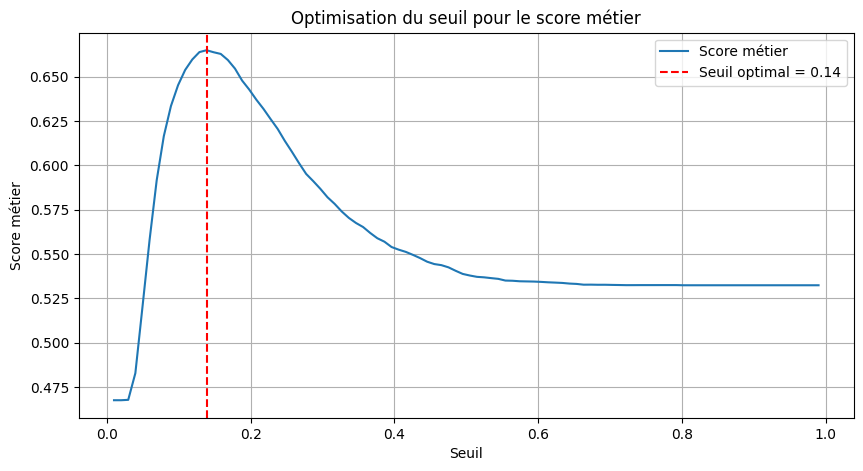

In [16]:
# Optimisation du seuil pour le score métier
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Proba de classe 1

# Tester plusieurs seuils
seuils = np.linspace(0.01, 0.99, 100)
scores_metier = []

for seuil in seuils:
    y_pred_test_tmp = (y_test_proba >= seuil).astype(int)
    score = score_metier(y_test, y_pred_test_tmp)
    scores_metier.append(score)

# Choix du seuil optimal
seuil_optimal = seuils[np.argmax(scores_metier)]
print(f"✅ Seuil optimal trouvé : {seuil_optimal:.2f}")

# Utiliser ce seuil pour prédire
y_pred_test = (y_test_proba >= seuil_optimal).astype(int)
y_pred_train = best_model.predict(X_train_res)  # train reste avec seuil par défaut

# Affichage graphique du score métier par seuil
plt.figure(figsize=(10, 5))
plt.plot(seuils, scores_metier, label='Score métier')
plt.axvline(seuil_optimal, color='r', linestyle='--', label=f'Seuil optimal = {seuil_optimal:.2f}')
plt.xlabel("Seuil")
plt.ylabel("Score métier")
plt.title("Optimisation du seuil pour le score métier")
plt.grid(True)
plt.legend()
plt.show()


In [17]:
# Résultats LightGBM
for set_name, y_true, y_pred in [("Train", y_train_res, y_pred_train), ("Test", y_test, y_pred_test)]:
    results.append({
        "Model": "LightGBM",
        "Set": set_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F2": fbeta_score(y_true, y_pred, beta=2),
        "Score_Metier": score_metier(y_true, y_pred)
    })

In [18]:
import joblib

In [19]:

# Enregistrement du modèle
os.makedirs("models", exist_ok=True)
with open("models/best_model_lightgbm.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Sauvegarde des colonnes utilisées à l'entraînement
with open("models/columns_used.pkl", "wb") as f:
    pickle.dump(X_train_res.columns.tolist(), f)
    
joblib.dump(X_train.dtypes.apply(lambda dt: dt.name).to_dict(), "models/columns_dtypes.pkl")

# Tracking MLflow
with mlflow.start_run(run_name="LightGBM_with_SMOTE"):
    mlflow.log_params(search.best_params_)
    mlflow.log_metrics({
        "Accuracy": accuracy_score(y_test, y_pred_test),
        "Precision": precision_score(y_test, y_pred_test),
        "Recall": recall_score(y_test, y_pred_test),
        "F2": fbeta_score(y_test, y_pred_test, beta=2),
        "Score_Metier": score_metier(y_test, y_pred_test)
    })
    mlflow.sklearn.log_model(best_model, "model")

2025/05/06 16:54:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


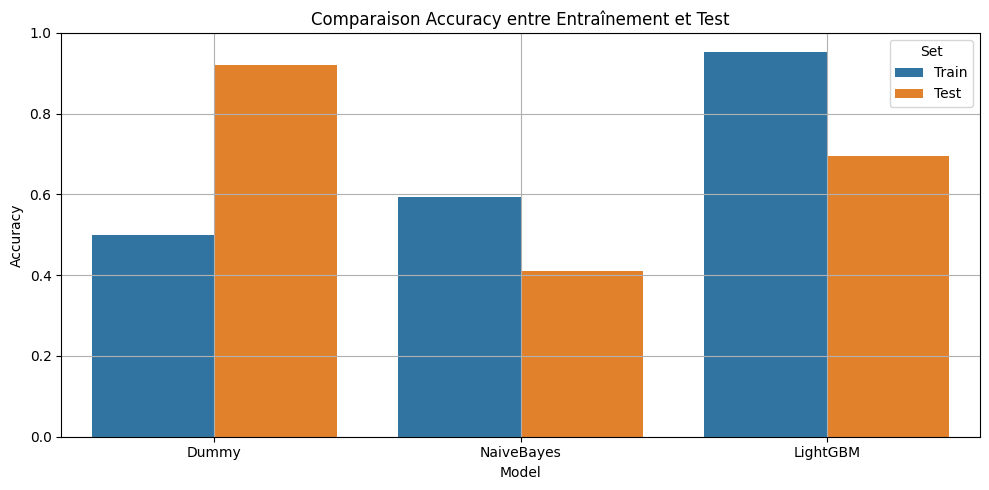

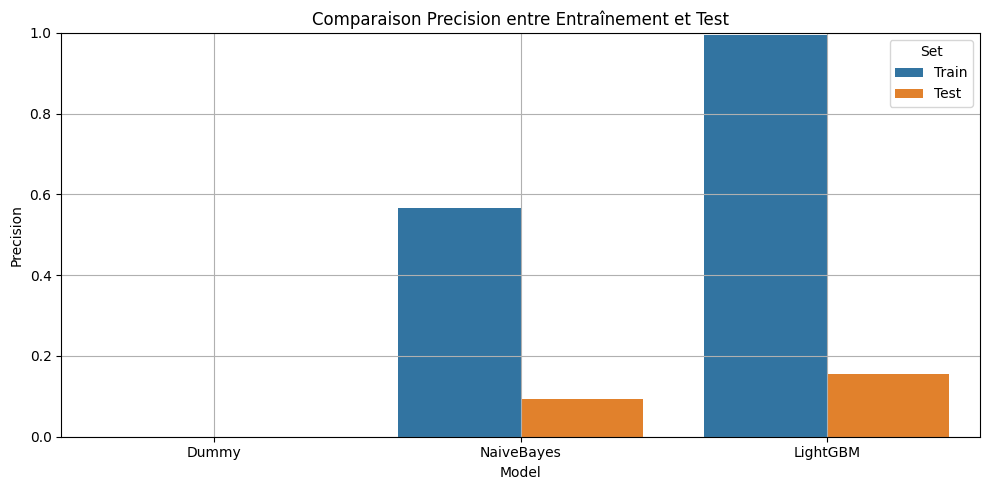

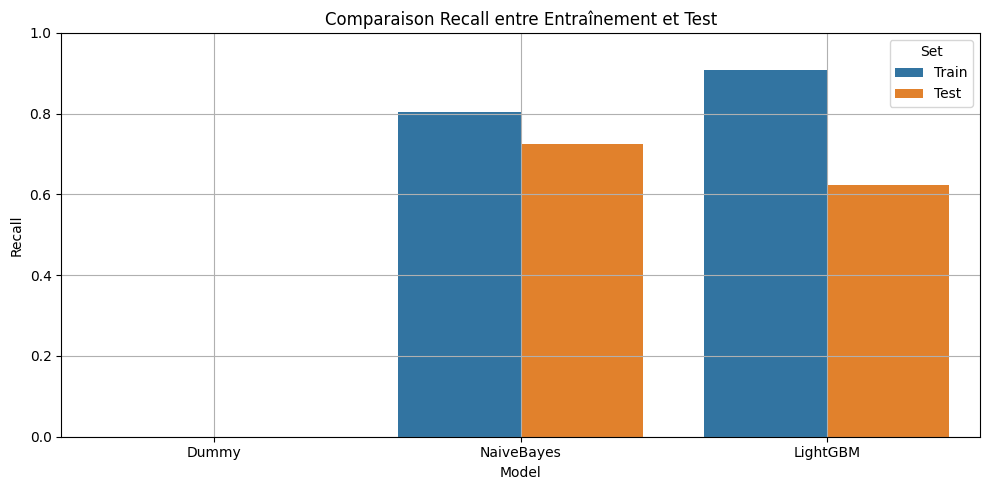

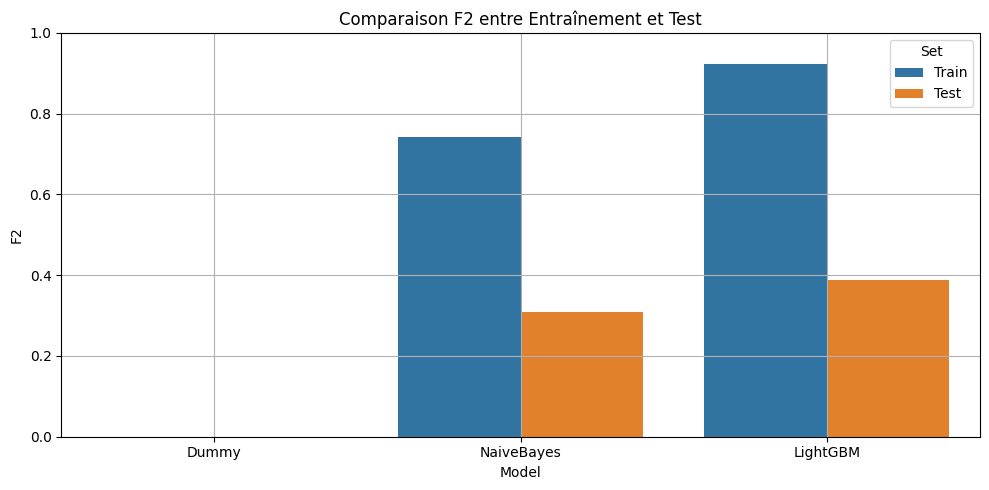

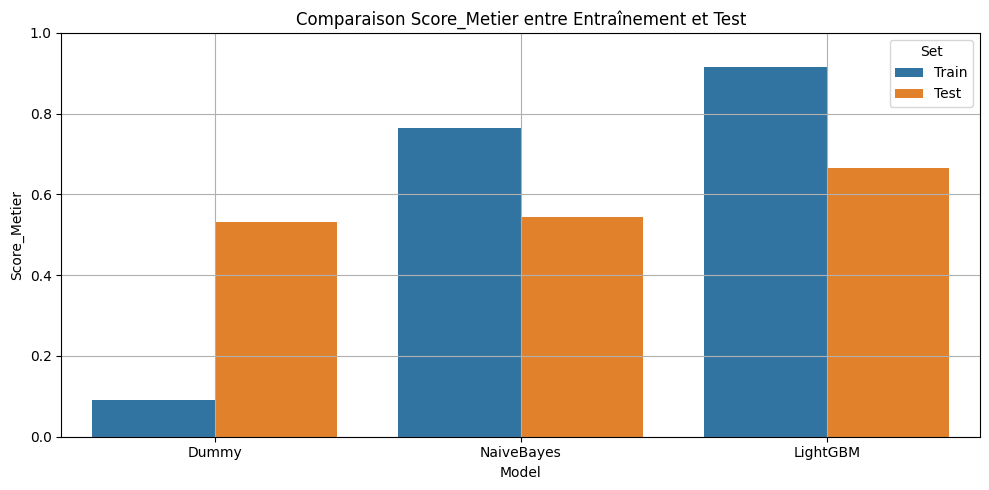

In [20]:
# Comparaison des performances
results_df = pd.DataFrame(results)
metrics = ["Accuracy", "Precision", "Recall", "F2", "Score_Metier"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=results_df, x="Model", y=metric, hue="Set")
    plt.title(f"Comparaison {metric} entre Entraînement et Test")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

c:\Users\inesn\OneDrive - Université de Paris\credit_score_projet7\venv\lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


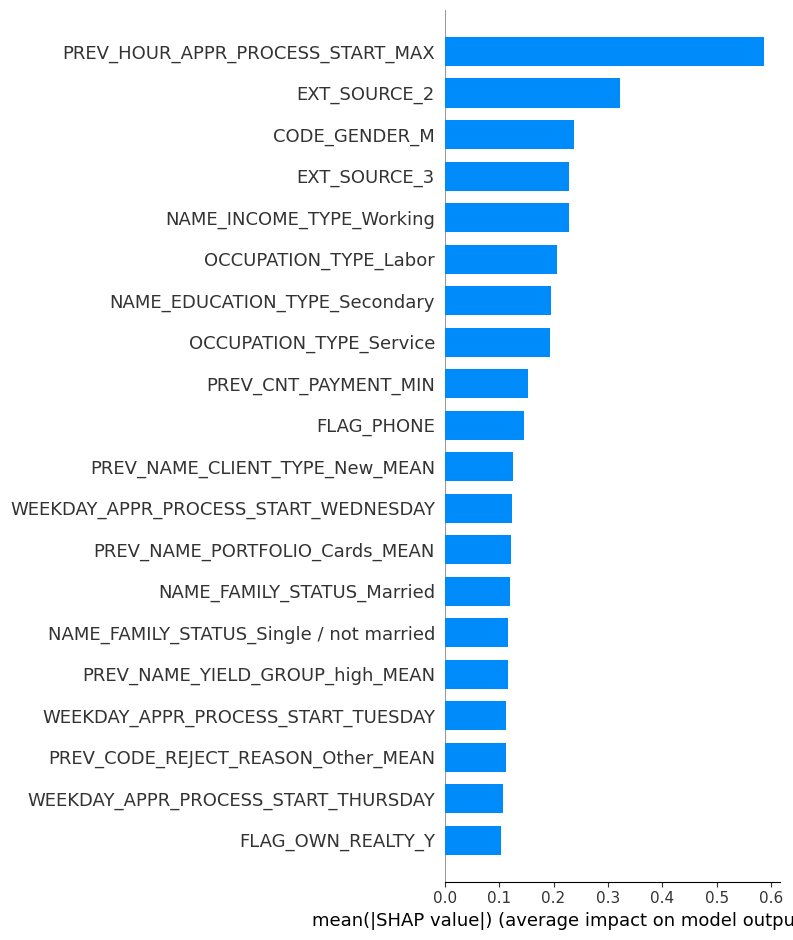

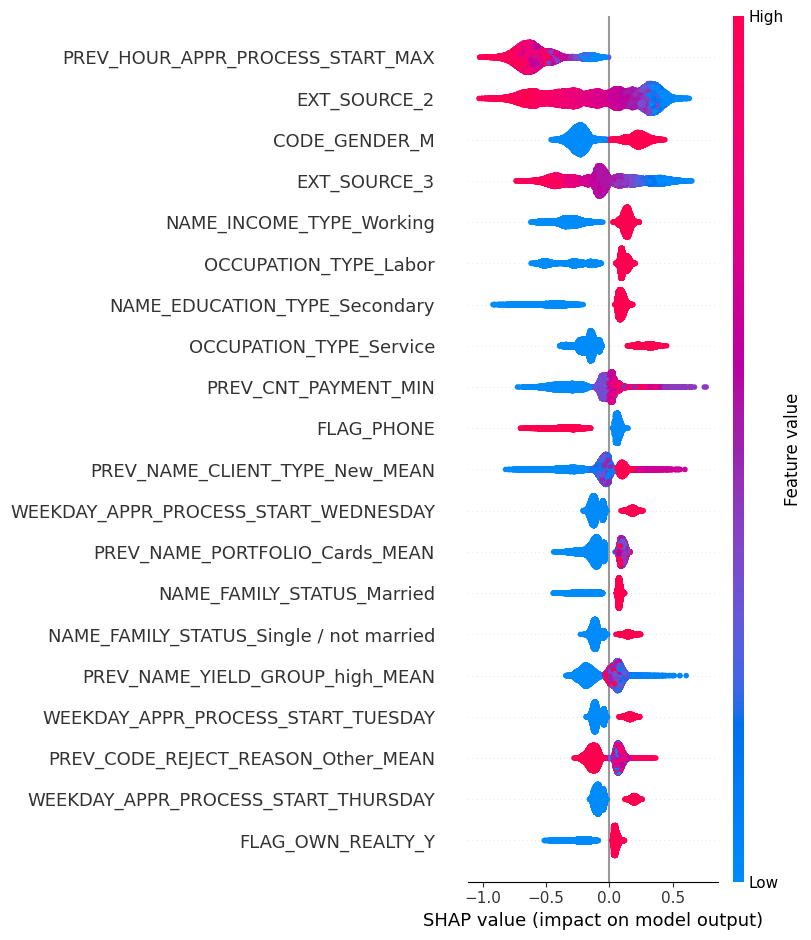

In [21]:
import shap

# Initialisation du TreeExplainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# === SHAP GLOBAL ===
plt.figure()
shap.summary_plot(shap_values, X_test, plot_type="bar")

# === SHAP DÉTAILLÉ (Global) ===
shap.summary_plot(shap_values, X_test)


<Figure size 640x480 with 0 Axes>

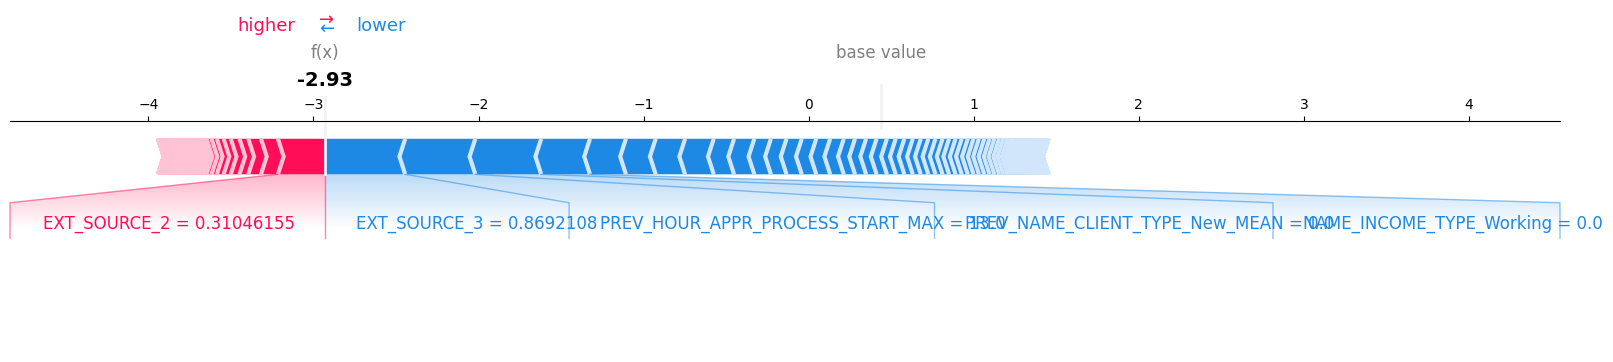

In [22]:
# === SHAP LOCAL ===
# Choix d’un client au hasard (ou un ID spécifique)
index_client = 0  # ou remplace par un identifiant client spécifique

plt.figure()
shap.force_plot(explainer.expected_value, shap_values[index_client], X_test.iloc[index_client], matplotlib=True)